In [1]:
import pandas as analytics
import os
import matplotlib.pyplot as graph
import numpy as maths
from math import log
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('../data/')

In [3]:
filename = 'data5.csv'

# Total 9 datasets
# data 5, data 8 -> Multi Class
# rest all binary class

# Manual Preprocessing

In [4]:
df_raw = analytics.read_csv(filename,header=None)
df_raw

,0,1,2,3
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


In [5]:
df_raw[3].unique()

array([1, 2, 3])

In [6]:
# df_raw = df_raw.drop(['sex','age'],axis =1)
df_raw[2] = df_raw[2].replace(-1,0)
df_raw.to_csv('check.csv',header=None,index=False)
df_raw = analytics.read_csv('check.csv',header=None)

In [7]:
cols = ['x'+str(i+1) for i in df_raw.columns[:-1]] + ['y']
df_raw.columns = cols
df_raw['y'] = df_raw['y'].replace(-1,0)
df_raw

,x1,x2,x3,y
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


# Working Processing

In [8]:
training_perc = 0.7

In [9]:
training_number =  int(training_perc * len(df_raw))
df_raw = df_raw.sample(frac = 1)
df_train = df_raw[:training_number]
df_test = df_raw[training_number:]

In [10]:
maxima = {}
minima = {}
for col in df_raw.columns[:-1]:
    maxima.update({col:df_train[col].max()})
    minima.update({col:df_train[col].min()})    
    df_train[col] = (df_train[col] - minima[col])/(maxima[col] - minima[col])
df_train

,x1,x2,x3,y
0,0.330839,0.446573,0.695957,1
208,0.569466,0.597075,0.468499,3
114,0.917470,1.000000,0.236569,2
265,0.643522,0.169543,0.430553,3
37,0.322982,0.225757,0.900323,1
...,...,...,...,...
297,0.397869,0.346314,0.338864,3
298,0.385072,0.239121,0.317500,3
246,0.452459,0.342008,0.316025,3
292,0.553684,0.301325,0.297144,3


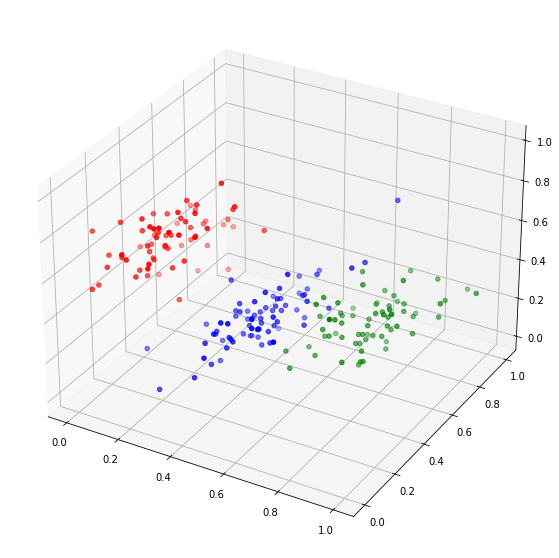

In [11]:
df_c1 = df_train[df_train['y'] == 1]
df_c2 = df_train[df_train['y'] == 2]
df_c3 = df_train[df_train['y'] == 3]

    
if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_c1['x1'],df_c1['x2'],df_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_c2['x1'],df_c2['x2'],df_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_c3['x1'],df_c3['x2'],df_c3['x3'],c = 'blue', label = "Class 3")
    
    # ax.show()
    

In [12]:
mu_c1 = df_c1.iloc[:,:-1].mean()
mu_c2 = df_c2.iloc[:,:-1].mean()
mu_c3 = df_c3.iloc[:,:-1].mean()

In [13]:
x_c1 = (df_c1 - mu_c1).iloc[:,:-1]
x_c2 = (df_c2 - mu_c2).iloc[:,:-1]
x_c3 = (df_c3 - mu_c3).iloc[:,:-1]

In [14]:
covariance_matrix_c1 = (x_c1.T @ x_c1) / (len(x_c1) - 1 ) 
covariance_matrix_c2 = (x_c2.T @ x_c2) / (len(x_c2) - 1 ) 
covariance_matrix_c3 = (x_c3.T @ x_c3) / (len(x_c3) - 1 ) 

In [15]:
covariance_matrix = ((len(x_c1) - 1 )*covariance_matrix_c1 + (len(x_c2) - 1 )*covariance_matrix_c2 + (len(x_c3) - 1 )*covariance_matrix_c3)/((len(x_c1) - 1 ) + (len(x_c1) - 1 ) + (len(x_c3) - 1 ))
covariance_matrix

,x1,x2,x3
x1,0.009426,0.006796,0.004777
x2,0.006796,0.013658,0.003615
x3,0.004777,0.003615,0.010816


In [16]:
mu_c1 = df_c1.iloc[:,:-1].mean()
mu_c2 = df_c2.iloc[:,:-1].mean()
mu_c3 = df_c3.iloc[:,:-1].mean()

In [17]:
covariance_matrix_inv = maths.linalg.inv(covariance_matrix)
covariance_matrix_inv

array([[194.38506131, -81.18419951, -58.71129927],
       [-81.18419951, 114.23140744,  -2.3290672 ],
       [-58.71129927,  -2.3290672 , 119.16476612]])

In [18]:
w_c1_c2 = covariance_matrix_inv @ maths.array(mu_c1 - mu_c2)
w_c1_c2 = maths.array(w_c1_c2).reshape(-1,1)
w_c2_c3 = covariance_matrix_inv @ maths.array(mu_c2 - mu_c3)
w_c2_c3 = maths.array(w_c2_c3).reshape(-1,1)

# w_c1_c2.shape

In [19]:
pi_c1 = len(df_c1)/len(df_train)
pi_c2 = len(df_c2)/len(df_train)
pi_c3 = len(df_c3)/len(df_train)

In [31]:
w0_c1_c2 = (- 0.5 * mu_c1 @ covariance_matrix_inv @ mu_c1.T) + (0.5 * mu_c2 @ covariance_matrix_inv @ mu_c2.T) + log(abs(pi_c1 / pi_c2))
w0_c2_c3 = (- 0.5 * mu_c2 @ covariance_matrix_inv @ mu_c2.T) + (0.5 * mu_c3 @ covariance_matrix_inv @ mu_c3.T) + log(abs(pi_c2 / pi_c3))

In [37]:
hyperplane_c1_c2 = maths.array([-(w_c1_c2[0] * df_train['x1'] + w0_c1_c2)/w_c1_c2[2] , (w_c1_c2[1] * df_train['x2']  + w0_c1_c2)/w_c1_c2[2]])
hyperplane_c2_c3 = maths.array([-((w_c2_c3[0] * df_train['x1']) + w0_c2_c3)/w_c2_c3[2] , -((w_c2_c3[1] * df_train['x2'])  + w0_c2_c3)/w_c2_c3[2]])

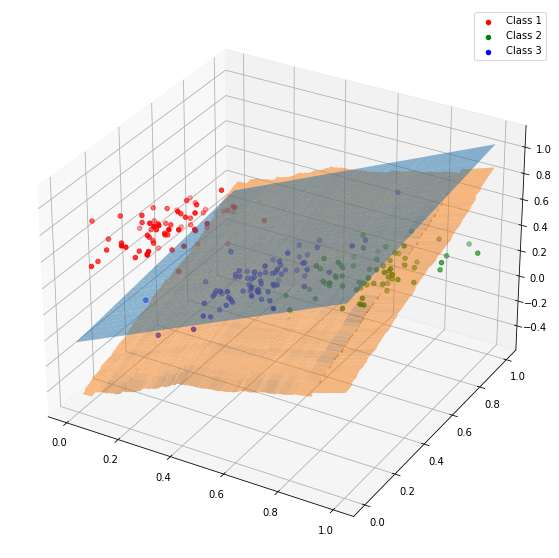

In [62]:
  
if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :

    xx_12, yy_12 = maths.meshgrid(df_train['x1'].sort_values(), df_train['x2'].sort_values())
    xx_23, yy_23 = maths.meshgrid(df_train['x2'].sort_values(), df_train['x3'].sort_values())
    z_12 = -(w_c1_c2[0] * xx + w_c1_c2[1] * yy + w0_c1_c2)/w_c1_c2[2] 
    z_23 = -(w_c2_c3[0] * xx + w_c2_c3[1] * yy + w0_c2_c3)/w_c2_c3[2] 
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_c1['x1'],df_c1['x2'],df_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_c2['x1'],df_c2['x2'],df_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_c3['x1'],df_c3['x2'],df_c3['x3'],c = 'blue', label = "Class 3")
    ax.plot_surface(xx_12,yy_12,z_12,alpha = 0.5)
    ax.plot_surface(xx_23,yy_23,z_23,alpha = 0.5)
    ax.legend()

    

In [44]:
hyperplane_c1_c2.T

array([[ 2.56522103e-01, -4.03030067e-02],
       [ 4.72937106e-01, -6.85534976e-02],
       [ 7.88548146e-01, -1.44185404e-01],
       [ 5.40099156e-01,  1.16975698e-02],
       [ 2.49395812e-01,  1.14564845e-03],
       [ 5.72217041e-01, -8.73617638e-02],
       [ 6.52584212e-01, -8.96472572e-02],
       [ 5.45738154e-01, -6.17928065e-02],
       [ 4.87075281e-01, -1.07617509e-01],
       [ 3.64329180e-01, -2.44294064e-02],
       [ 5.91050991e-01, -3.78236945e-02],
       [ 3.26363821e-01,  1.09430209e-02],
       [ 4.84367646e-01, -5.95622097e-02],
       [ 4.53792986e-01, -2.63295112e-02],
       [ 4.54171800e-01,  7.00950749e-03],
       [ 4.31610975e-01, -8.79926089e-04],
       [ 4.13171780e-01, -1.90131315e-02],
       [ 3.62119852e-01, -2.33210065e-02],
       [ 3.25377377e-01,  7.43075529e-03],
       [ 2.09782991e-01,  3.22961392e-02],
       [ 2.06134676e-01, -2.25285341e-02],
       [ 7.23336102e-01, -1.28724713e-01],
       [ 1.84534616e-01,  2.04597482e-02],
       [ 1.

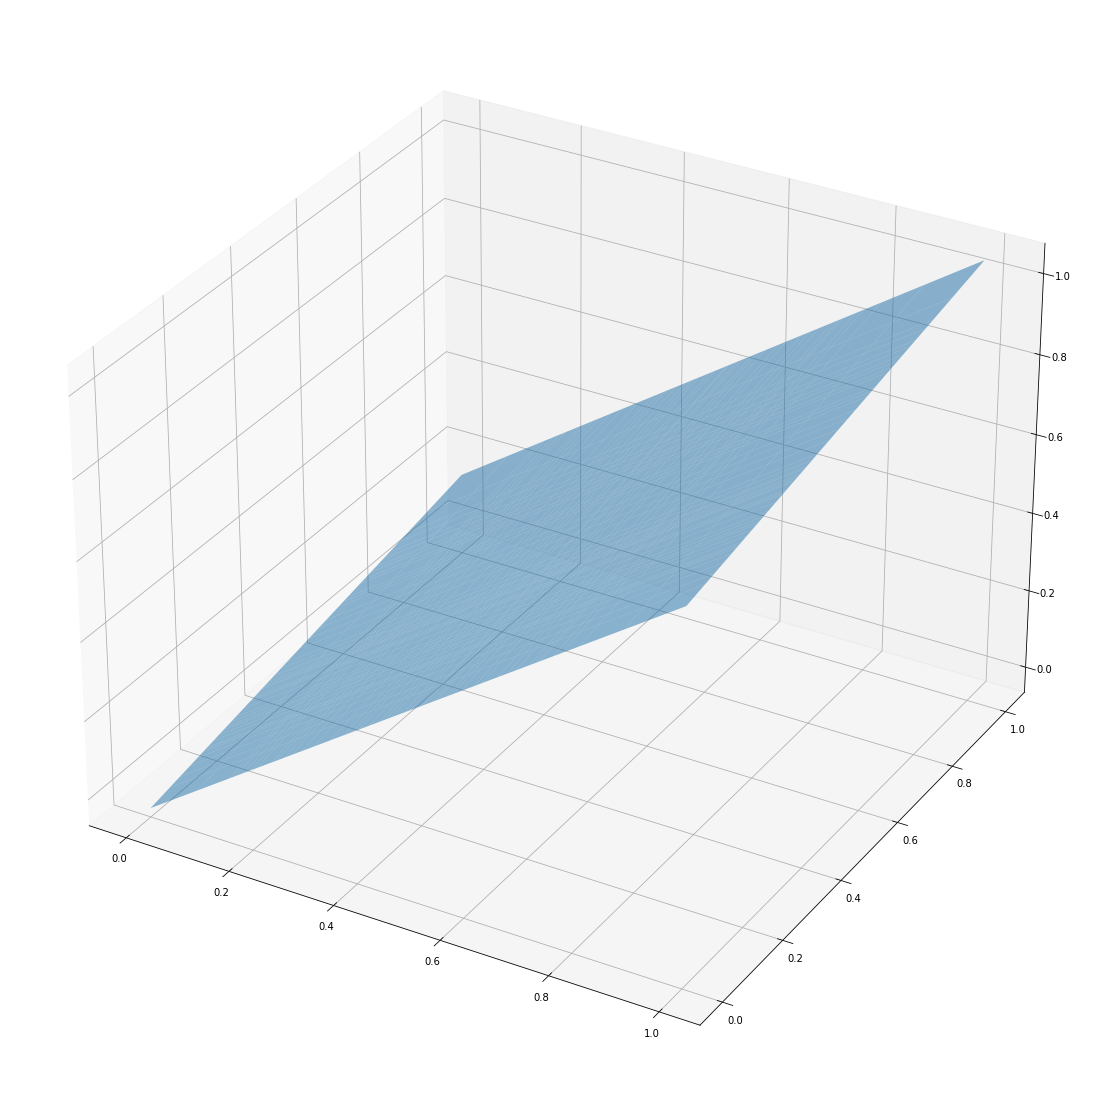

In [55]:
fig = graph.figure(figsize = (20,20))
ax = fig.add_subplot(projection='3d')

xx, yy = maths.meshgrid(df_train['x1'].sort_values(), df_train['x2'].sort_values())
z = -(w_c1_c2[0] * xx + w_c1_c2[1] * yy + w0_c1_c2)/w_c1_c2[2] 

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

graph.show()

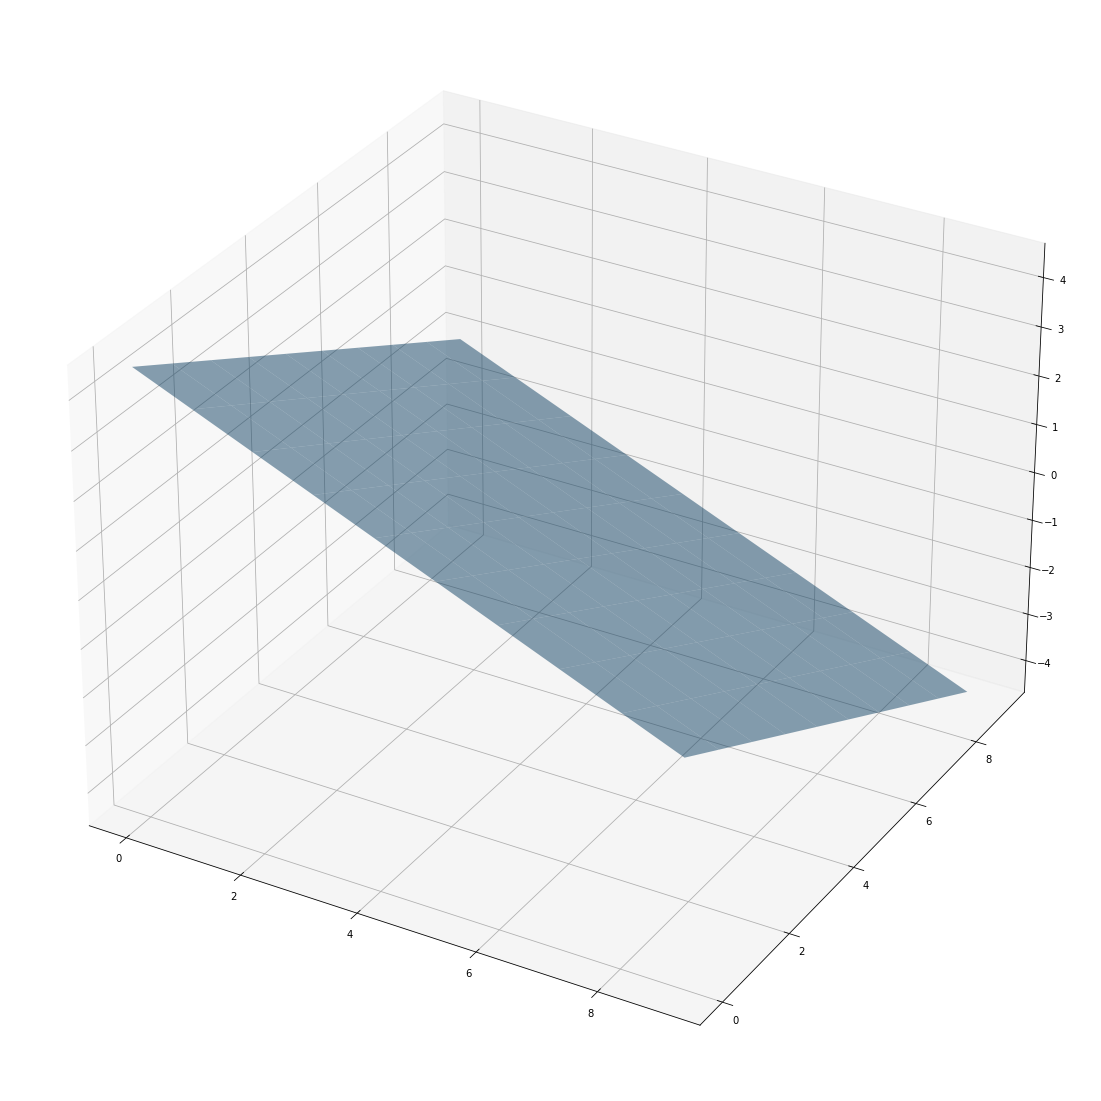

In [25]:
# create the figure
fig = graph.figure(figsize = (20,20))

# add axes
ax = fig.add_subplot(projection='3d')

xx, yy = maths.meshgrid(range(10), range(10))
z = (9 - xx - yy) / 2 

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

graph.show()

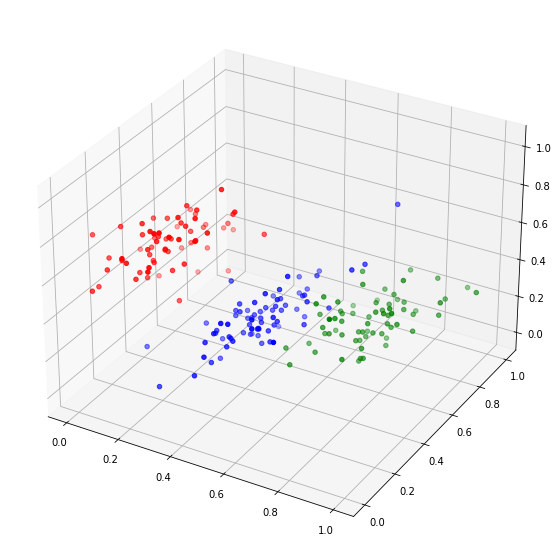

In [26]:
figure = graph.figure(figsize = (10,10))
ax = figure.add_subplot(projection='3d')
ax.scatter(df_c1['x1'],df_c1['x2'],df_c1['x3'],c = 'red',label = "Class 1")
ax.scatter(df_c2['x1'],df_c2['x2'],df_c2['x3'],c = 'green',label = "Class 2")
ax.scatter(df_c3['x1'],df_c3['x2'],df_c3['x3'],c = 'blue', label = "Class 3")
ax.plot_surface(df_train['x1'],df_train['x2'],hyperplane_c1_c2,alpha = 1)
graph.show()

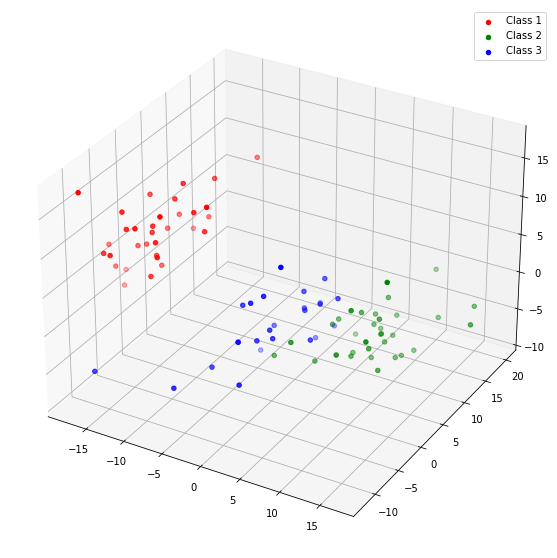

In [29]:
df_test_c1 = df_test[df_test['y'] == 1]
df_test_c2 = df_test[df_test['y'] == 2]
df_test_c3 = df_test[df_test['y'] == 3]


test_hyperplane_c1_c2 = maths.array([-((w_c1_c2[0] * df_test['x1']) + w0_c1_c2 )/w_c1_c2[2] , -((w_c1_c2[1] * df_test['x2'])  + w0_c1_c2)/w_c1_c2[2]])
test_hyperplane_c2_c3 = maths.array([-((w_c2_c3[0] * df_test['x1']) + w0_c2_c3 )/w_c2_c3[2] , -((w_c2_c3[1] * df_test['x2'])  + w0_c2_c3)/w_c2_c3[2]])

if len(df_raw.columns) == 3:
    figure = graph.figure(figsize=(10,10))
    graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
    graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
    graph.title("Class")
    graph.xlabel("X1")
    graph.ylabel("X2")
    graph.legend()
    graph.show()
elif len(df_raw.columns) == 4 :

    x , y = maths.meshgrid(df_test['x1'],df_test['x2'])
    z12 = -(w_c1_c2[0]*x + w_c1_c2[1] *y + w0_c1_c2 ) / w_c1_c2[2]
    figure = graph.figure(figsize = (10,10))
    ax = figure.add_subplot(projection='3d')
    ax.scatter(df_test_c1['x1'],df_test_c1['x2'],df_test_c1['x3'],c = 'red',label = "Class 1")
    ax.scatter(df_test_c2['x1'],df_test_c2['x2'],df_test_c2['x3'],c = 'green',label = "Class 2")
    ax.scatter(df_test_c3['x1'],df_test_c3['x2'],df_test_c3['x3'],c = 'blue', label = "Class 3")
    # ax.plot_surface(x,y,z12,alpha = 0.002)
    # ax.plot_surface(df_test['x1'],df_test['x2'],test_hyperplane_c2_c3,alpha = 0.1)
    ax.legend()

In [ ]:
x.T